In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Matplotlib (plt): Genel amaçlı veri görselleştirme kütüphanesi. Çeşitli grafik türleri oluşturmak için temel fonksiyonlar sağlar.
- Seaborn: Matplotlib üzerine inşa edilmiş ve istatistiksel veri görselleştirme için geliştirilmiş bir kütüphanedir. Daha estetik ve bilgi açısından zengin grafikler oluşturmayı kolaylaştırır

In [2]:
#1
df = pd.read_csv("StudentsPerformance.csv")#dosyayı okuyalım
df.head() # ilk beş satırı getirir

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
#2
#kadın-erkek sayısına bakalım
df["gender"].value_counts() 

gender
female    518
male      482
Name: count, dtype: int64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender', ylabel='Count'>

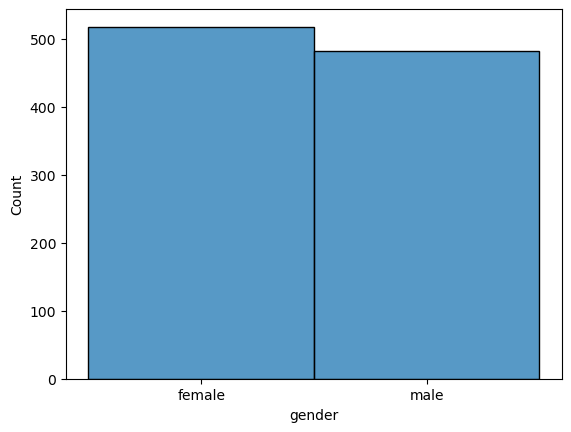

In [8]:
#3
#kadın-erkek sayısına histogram grafiği ile bakalım
sns.histplot( x="gender" ,data=df)


In [10]:
#4
#race/ethnicity sütununda kaç farklı grup olduğuna bakalım
df["race/ethnicity"].unique() # unique:eşsiz demek kaç farklı olduğunu gösterir

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
race = df["race/ethnicity"].value_counts()
race

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Text(0, 0.5, 'Count')

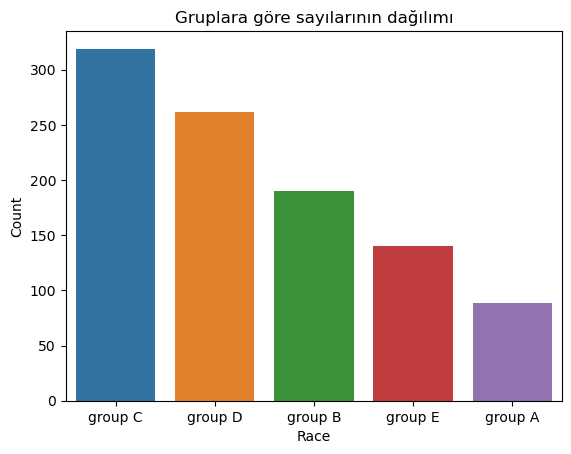

In [24]:
#5
#yukarıda bulduğumuzu görselleştirelim
sns.barplot( x=race.index, y=race.values)
plt.title("Gruplara göre sayılarının dağılımı") #grafik başlığı ekler
plt.xlabel("Race") # x ekseninin etiket adı
plt.ylabel("Count")  # y eksenin etiket adı

In [27]:
#6
#parental level of education sütunundaki eşsiz değerleri bulalım
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [28]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [29]:
#7
#lunch sütununda eşsiz değerlere ulaşalım
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [30]:
#8
#lunch türlerinde kaçar kişi olduğunu bulalım
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [31]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [36]:
#9
#gender sütunundaki değerler için ortalama math score, reading score, writing score değerlerini bulalım.
df.groupby("gender")[["math score","reading score","writing score"]].mean().reset_index()

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


- mean() ortalamasını almamızı ister
- reset_index()  Bu kısım, grup adlarının DataFrame'in yeni bir sütunu olarak eklenmesini sağlar ve grup adları orijinal index olarak kullanılmaz. 

In [37]:
#10
#race/ethnicity sütunundaki değerler için ortalama math score, reading score, writing score değerlerini bulalım.
df.groupby("race/ethnicity")[["math score","reading score","writing score"]].mean().reset_index()

,race/ethnicity,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


In [39]:
#11
#parental level of education sütunundaki değerler için ortalama math score, reading score, writing score değerlerini bulalım.
df.groupby("parental level of education")[["math score","reading score","writing score"]].mean().reset_index()

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [40]:
#12
#lunch sütunundaki değerler için ortalama math score, reading score, writing score değerlerini bulalım.
df.groupby("lunch")[["math score","reading score","writing score"]].mean().reset_index()

,lunch,math score,reading score,writing score
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


In [41]:
#13
#test preparation course sütunundaki değerler için ortalama math score, reading score, writing score değerlerini bulalım.
df.groupby("test preparation course")[["math score","reading score","writing score"]].mean().reset_index()

,test preparation course,math score,reading score,writing score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


In [42]:
df.tail() # son beş satır

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [43]:
df["math score"].max()

100

In [44]:
df["math score"].min()

0

In [49]:
grupC = df[(df["race/ethnicity"] == "group C") & (df["gender"] == "female")]
grupC #grup C olan kadınları getir

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
15,female,group C,some high school,standard,none,69,75,78
19,female,group C,associate's degree,free/reduced,none,54,58,61
23,female,group C,some high school,standard,none,69,73,73
27,female,group C,bachelor's degree,standard,none,67,69,75
...,...,...,...,...,...,...,...,...
975,female,group C,some college,standard,completed,64,82,77
979,female,group C,associate's degree,standard,none,91,95,94
984,female,group C,some high school,standard,none,74,75,82
986,female,group C,associate's degree,standard,none,40,59,51


In [50]:
df[df["parental level of education"] == "bachelor's degree"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
27,female,group C,bachelor's degree,standard,none,67,69,75
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72
77,male,group A,bachelor's degree,standard,completed,80,78,81
...,...,...,...,...,...,...,...,...
916,male,group E,bachelor's degree,standard,completed,100,100,100
933,male,group C,bachelor's degree,free/reduced,completed,70,75,74
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
